<a href="https://colab.research.google.com/github/hamiin47/Assignment/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

전처리


In [25]:
pip install lightgbm==3.3.2

In [26]:
import lightgbm
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [28]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [29]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [30]:
submission.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [31]:
import pandas as pd

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# 각 열의 결측값 개수 확인
print("Train 데이터 결측값 개수:\n", train.isna().sum())
print("\nTest 데이터 결측값 개수:\n", test.isna().sum())


Train 데이터 결측값 개수:
 index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

Test 데이터 결측값 개수:
 index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64


결측값이 없음을 확인할 수 있다.

In [32]:
import pandas as pd

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# white -> 0, red -> 1
train['type'] = train['type'].map({'white': 0, 'red': 1}).astype(int)
test['type'] = test['type'].map({'white': 0, 'red': 1}).astype(int)

print("변환 후 Train 데이터:\n", train.head())
print("\n변환 후 Test 데이터:\n", test.head())

변환 후 Train 데이터:
    index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
4      4        6            7.8             0.400         0.26   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
4             9.5      0.059                 32.0                 178.0   

   density    pH  sulphates  alcohol  type  
0  0.99432  3.44       0.44     10.2     0  
1  0.99690  3.19       0.59      9.5   

white와 red를 숫자형으로 변환



---



Modeling

[GBM]

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('/content/train.csv')

train['type'] = train['type'].map({'white': 0, 'red': 1}).astype(int)

X = train.drop('quality', axis=1)
y = train['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f}초".format(time.time() - start_time))

GBM 정확도: 0.5918
GBM 수행 시간: 18.4초


[lightgbm]

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [35]:
X_features = train.drop(['index', 'quality'], axis=1)
y_label = train['quality']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [37]:
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [38]:
early_stopping = lgb.early_stopping(stopping_rounds=50)
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)
log_eval = lgb.log_evaluation(period=10)

callbacks = [
    early_stopping,
    log_eval
]

lgbm_wrapper.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], callbacks=callbacks)

test_features = test.drop(['index'], axis=1)
preds = lgbm_wrapper.predict(test_features)

submission['quality'] = preds
submission.to_csv('/content/sample_data/submission.csv', index=False)


Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 1.04631
[20]	valid_0's multi_logloss: 0.975453
[30]	valid_0's multi_logloss: 0.937066
[40]	valid_0's multi_logloss: 0.907092
[50]	valid_0's multi_logloss: 0.885372
[60]	valid_0's multi_logloss: 0.872288
[70]	valid_0's multi_logloss: 0.861993
[80]	valid_0's multi_logloss: 0.854345
[90]	valid_0's multi_logloss: 0.848423
[100]	valid_0's multi_logloss: 0.843376
[110]	valid_0's multi_logloss: 0.841452
[120]	valid_0's multi_logloss: 0.840408
[130]	valid_0's multi_logloss: 0.839614
[140]	valid_0's multi_logloss: 0.838903
[150]	valid_0's multi_logloss: 0.841129
[160]	valid_0's multi_logloss: 0.843903
[170]	valid_0's multi_logloss: 0.844093
[180]	valid_0's multi_logloss: 0.845953
Early stopping, best iteration is:
[132]	valid_0's multi_logloss: 0.838583


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)

    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')

    if pred_proba is not None:
        y_test_bin = label_binarize(y_test, classes=sorted(set(y_test)))
        roc_auc = roc_auc_score(y_test_bin, pred_proba, average='macro', multi_class='ovr')
    else:
        roc_auc = None

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도(macro): {1:.4f}, 재현율(macro): {2:.4f}, F1(macro): {3:.4f}'.format(
        accuracy, precision, recall, f1))

    if roc_auc is not None:
        print('AUC(macro): {0:.4f}'.format(roc_auc))


In [40]:
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)

get_clf_eval(y_test, preds, pred_proba)


오차 행렬
[[  0   1   0   2   0   0   0]
 [  0   5  18  12   0   0   0]
 [  0   5 238 101   7   0   0]
 [  0   1  90 359  42   1   0]
 [  0   0   7  83  91   2   0]
 [  0   0   0  14   9  11   0]
 [  0   0   0   1   0   0   0]]
정확도: 0.6400, 정밀도(macro): 0.4450, 재현율(macro): 0.3386, F1(macro): 0.3671
AUC(macro): 0.8575


In [41]:
my_submission = pd.read_csv('/content/sample_data/submission.csv')
my_submission.head()

,index,quality
0,0,5
1,1,5
2,2,5
3,3,6
4,4,6




---
시각화


In [52]:
importance_df = pd.DataFrame({
    'Feature': lgbm_wrapper.booster_.feature_name(),
    'Importance': lgbm_wrapper.feature_importances_
}).sort_values(by='Importance', ascending=False)

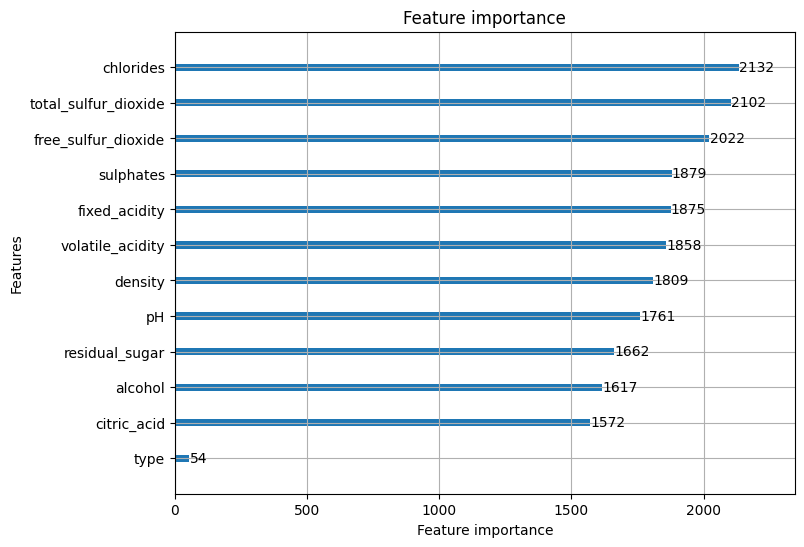

In [54]:
lgbm_wrapper = lgb.LGBMClassifier()
lgbm_wrapper.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(8, 6))
lgb.plot_importance(lgbm_wrapper, ax=ax)
plt.show()

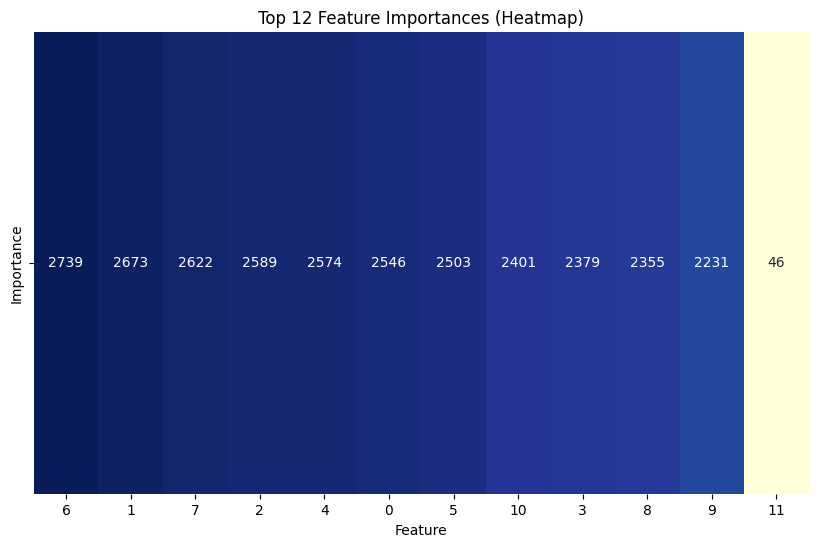

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df[['Importance']].T, annot=True, cmap="YlGnBu", cbar=False, fmt='.0f')
plt.title('Top 12 Feature Importances (Heatmap)')
plt.xlabel('Feature')
plt.show()


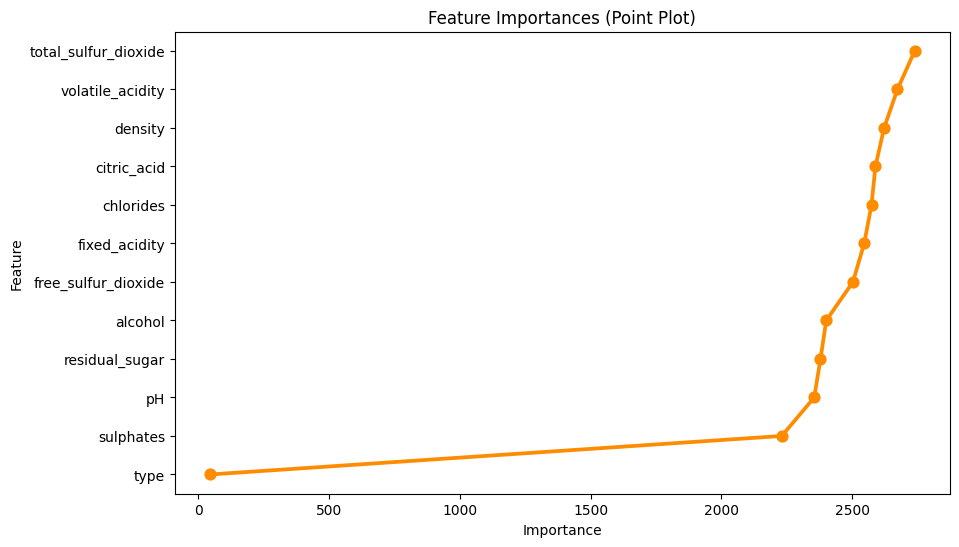

In [47]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Importance', y='Feature', data=importance_df, color="darkorange", markers="o")
plt.title('Feature Importances (Point Plot)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


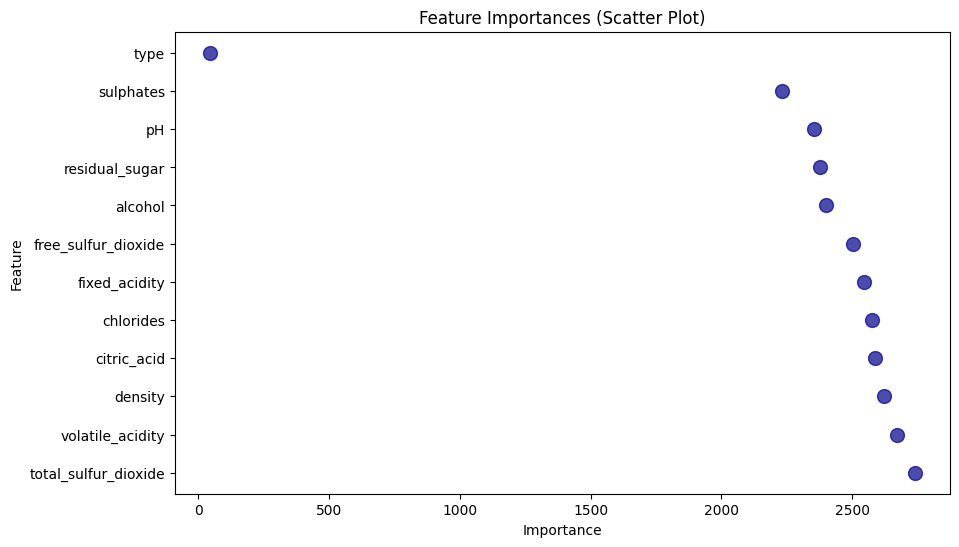

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(importance_df['Importance'], importance_df['Feature'], color="darkblue", s=100, alpha=0.7)
plt.title('Feature Importances (Scatter Plot)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()